In [2]:
# Dimitrios Bikoulis
# Student number: R00209268
# Libraries we are going to use for this assignment
import numpy as np
import glob
import pandas as pd
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import re
import random as rd
import nltk #nltk.download('stopwords')
from nltk.corpus import stopwords

In [3]:
#FUNCTIONS
def lowcase(x):
    return x.lower() #it returns the text without capital leters

def dell1(x):#A different approach can be used creating only 2 lines of code and the library re. However, the code was found on the internet and I prefered to use my own code. The computational cost is higher than the 2 lines of code as two loops were used 
    global set1 #Global to have access to the variable set1 which is outside of the function
    ll=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',' ','0','1','2','3','4','5','6','7','8','9'] #We create a list with the characters that we dont want to delete them
    for i in list(set1) :#A for loop in the set1 as a list. set gives each character without duplications occured in all the emails. It was created using union. A set for each email was created and we used union to link them toghether
        if i in ll :#If it is in the list we pass 
            pass
        else:#If not we replace the character which is not in the list with a space character
            x=x.replace(i,"")
    i=0 #We initialize a variable with value 0 which is gonna be our step
    while i<len(x)-1: #If it is less than len(x, x is a character)-1 we break the while. -1 was used for not getting out of bounds error as i+1 is used as an index in the if statement below
        if x[i]==' ' and x[i+1]==' ':#If two consequtive characters are equal to space we have to delete one of them
            x=x[0:i]+x[i+1:]#We delete it by ignoring it. we add two strings object from the beginning to i(which is not included as it is the space we want to delete) + from i+1 to end
            x=x+'1'#we add a random character to avoid changing its length
            i=i-1 #We subtract 1 to check again the same gap taking into account that step will be applied on the next row(it is used when we have more than one gaps in a row) 
        i=i+1 # and the step which will lead us to break the loop
    return x.replace('1','') # finally we replace with blank all the 'ones' which were added to the string to keep the same length. The result is returned 

def numofwords(x):#We ask for the user to give ham spam or all and it will return the unique words as a key and the number of occurances as a value of the dictionary, it also returns the total number of words for each category(ham,spam or all)
    if x=='ham':#if they choose ham
        ind=0 
        forl=y_train[y_train['target']==ind].index #forl takes the index of the dataset whose emails are ham (in the dataset emails with ham are zero and emails with spam are 1)
    elif x=='spam':
        ind=1
        forl=y_train[y_train['target']==ind].index #same as above the difference is that the forl has the indexes for emails which are spam
    else:
        forl=y_train.index #if not ham or spam is selected it returns the index of each emails
    k={} #an empty dictionary which is gonna be the dictionary that the function returns.
    lex=stopwords.words('english') #We pass into lex the stopwords for english language
    numberofwords=0 #the counter which determines the total number of words
    for i in forl: #We run a for, i will take all the indexes
        for j in x_train['emails'][i].split(): #we run a second for loop. j will take the words (because split was used) in a specific email(it depends on the first for loop). 
            numberofwords=numberofwords+1 # we add one to the counter
            if j in k: #if j is in k (which is the dictionary the function will return)
                k[j]=k[j]+1 #we add one to the value(number of occurances). When it goes into this if statement means that the word has already been added in the dictionary
            else: #if j is not in the dictionary(means that the word is new and does not exist for the moment)
                if j in lex: #if j is in lex which is the stopwords
                    pass #we pass which means that we do nothing
                else: #otherwise
                    if len(j)!=1: #if the length of the word is not 1 (words with only one letter are useless so we delete them)
                        k[j]=1 #add the word on the dictionary as a key with value 1 as it is the first time that we get this word
    return k,numberofwords #retun the number of words and the dictionary. It is a tuple



In [4]:
path=r'C:\Users\jimbi\OneDrive\Desktop\Semester 2\Applied Machine Learning\Assignement 1\enron1\ham\*.txt'#star was used to get all the files with an extension .txt
ham=[]#Two empty lists
target=[]
for i in glob.glob(path):#glob function will return all the documents with an extension .txt in ham dictionary and running the for loop, i will be the path for each document in each step 
    file=open(i,'r')#We open the file only to read it
    ham.append(file.read())#we append to the list ham the content of the txt file
    target.append(0)#we create a list with zeros to create the dataframe
    file.close()#We close each file as it wont be used anymore
path=r'C:\Users\jimbi\OneDrive\Desktop\Semester 2\Applied Machine Learning\Assignement 1\enron1\spam\*.txt'
for i in glob.glob(path):
    file=open(i,'r',encoding='latin1')
    ham.append(file.read())
    target.append(1)
    file.close

In [5]:
df_emails=pd.DataFrame({'emails':ham,'target':target})#We create a dataframe with names of columns as emails and target with the containt of the emails and zero respectively
df=df_emails['emails'].apply(lowcase) # we apply lower case to each email, it is the function we created above
set1=set() #we create an empty set.
for i in range(len(df_emails['emails'])): #we run a for in the range of the length of the dataframe
    set1=set1.union(set(df_emails['emails'][i])) #we use the union function. when the for loop stops we will have all the letters and special characters in the set. We dont pass it into the function dell1, because in the function dell1 the set1 is changed into global
df_emails['emails']=df.apply(dell1)# we apply the first two functions to clean the dataset

In [6]:
df_emails=pd.DataFrame({'emails':ham,'target':target})#We create a dataframe with names of columns as emails and target with the containt of the emails and zero respectively
df=df_emails['emails'].apply(lowcase) #a different approach to delete the special characters
ham1=[re.sub(r'[^a-z0-9]'," ",string) for string in df] #we delete all the letters that they are not from a to z and 0 to 9
ham2=[re.sub(r'\s\s+'," ",string) for string in ham1] #we delete the spaces
df_emails=pd.DataFrame({'emails':ham2,'target':target}) #we create a dataframe


In [7]:
np.random.seed(12345) # we set the seed to take the same results every time we run the code
shufle_df=df_emails.sample(frac=1).reset_index() #we shufle the dataset and reset the index. it reduces the bias as we dont have ham and spam emails in a specific location (ham used to be at the first x rows and spam at the last n-x rows)
shufle_df

,index,emails,target
0,1621,subject agua dulce and thompsonville products ...,0
1,3363,subject re epgt daren what about february 2000...,0
2,3277,subject re no actual vols for 5 22 01 we agree...,0
3,5101,subject cheap soft cialis tabs these pills are...,1
4,336,subject meter 986315 torch rally el sordo 1 00...,0
...,...,...,...
5167,3497,subject september cellular the following expen...,0
5168,3492,subject fw intrastate gas stacy could we add t...,0
5169,2177,subject cornhusker daren re the email below fr...,0
5170,3557,subject pricing needed citgo refinery corpus s...,0


In [191]:
print(len(shufle_df['target'][shufle_df['target']==0]))
print(len(shufle_df['target'][shufle_df['target']==1]))

3672
1500


In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(shufle_df,shufle_df.iloc[:,2],test_size=0.3) #We split the dataset into train and test

In [9]:
x_test=x_test.reset_index() # we reset the index in each one in order to avoid having problem with for loops
y_test=y_test.reset_index()
x_train=x_train.reset_index()
y_train=y_train.reset_index()

In [ ]:
#print(len(ham[0]))
#print(len(spam[0]))
#print(len(bagofwords[0]))
#del train['index']
#train=train.reset_index

In [10]:
ham=numofwords('ham') #we call the function numofwords for ham emails
spam=numofwords('spam') #same for spam
bagofwords=numofwords('all') #same for all. This variable it will also be the bag of words or vocabulary 

In [11]:
seriestot=pd.Series(bagofwords[0],index=bagofwords[0].keys()) #we create 3 series. the index is the words and the column is the number of occurances for each word-index
seriesham=pd.Series(ham[0],index=ham[0].keys())
seriesspma=pd.Series(spam[0],index=spam[0].keys())


In [12]:
df_fin=pd.DataFrame({'total':seriestot,"ham":seriesham,"spam":seriesspma}) #we create a dataframe with the series above
df_fin=df_fin.fillna(0) # we impute missing values with zero
df_fin

,total,ham,spam
00,1779,1370.0,409.0
000,1449,1268.0,181.0
0000,8,4.0,4.0
000000,75,0.0,75.0
000000000002858,1,1.0,0.0
...,...,...,...
zzezrjok,1,0.0,1.0
zzo,1,0.0,1.0
zzocb,1,0.0,1.0
zzso,1,0.0,1.0


In [13]:
print(df_fin['total'].nlargest(20)) #we print the 20 most frequent words with the number of occurances for all emails, ham and spam
print(df_fin['ham'].nlargest(20))
print(df_fin['spam'].nlargest(20))

ect        9828
subject    5569
hou        5134
enron      4493
2000       2975
please     2211
com        2109
gas        1994
deal       1873
00         1779
pm         1642
cc         1607
hpl        1601
meter      1587
000        1449
2001       1441
10         1429
thanks     1297
daren      1247
01         1221
Name: total, dtype: int64
ect        9825.0
hou        5134.0
enron      4493.0
subject    4418.0
2000       2909.0
gas        1869.0
please     1861.0
deal       1844.0
pm         1632.0
hpl        1601.0
cc         1598.0
meter      1587.0
2001       1438.0
00         1370.0
com        1370.0
000        1268.0
daren      1247.0
thanks     1236.0
10         1190.0
corp       1169.0
Name: ham, dtype: float64
subject        1151.0
http            765.0
com             739.0
company         560.0
td              484.0
www             462.0
font            450.0
nbsp            418.0
00              409.0
information     401.0
statements      375.0
get             365.0
heig

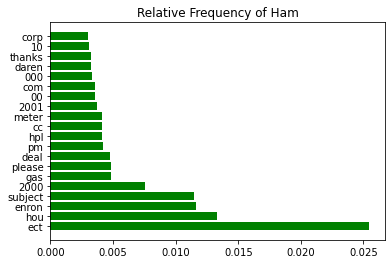

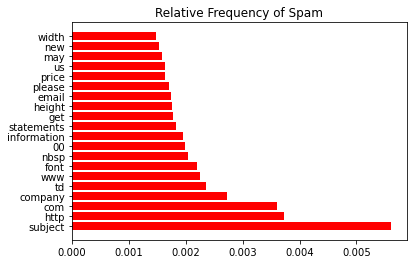

In [14]:
#we perform EDA
#Bar Plot for ham
plt.barh(df_fin['ham'].nlargest(20).index,df_fin['ham'].nlargest(20)/ham[1],color='g')
plt.title("Relative Frequency of Ham")
plt.show()
#Bar Plot for spam
plt.barh(df_fin['spam'].nlargest(20).index,df_fin['spam'].nlargest(20)/spam[1],color='r')
plt.title("Relative Frequency of Spam")
plt.show()

In [15]:
lengthham=[] #an empty list in which we will place the length of each ham email(number of words)
lengthspam=[] #an empty list in which we will place the length of each spam email(number of words)
k=0 #a counter
for i in x_train['emails']: #a for loop. in each iteration i will have the whole email
    if x_train["target"][k]==0: #each time the loop is executed the k gets larger by 1. with this approach we check each email if it is spam or ham to append it into different list.
        lengthham.append(len(i.split())) #we append the length of the email (number of words) in the list
    elif x_train["target"][k]==1:
        lengthspam.append(len(i.split()))
    k+=1

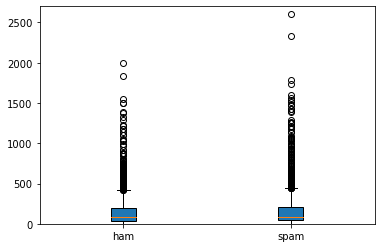

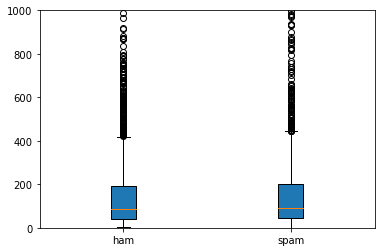

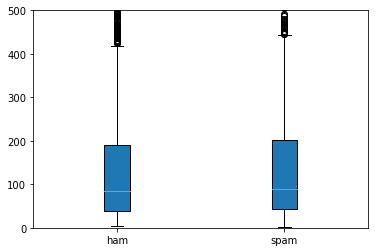

In [160]:
for i in [2700,1000,500]: #a for loop which zooms in to the boxplots
    plt.boxplot([[i for i in lengthham],[j for j in lengthspam]],patch_artist=True)
    plt.xticks([1,2],['ham','spam'])
    plt.ylim(0,i)
    plt.show()

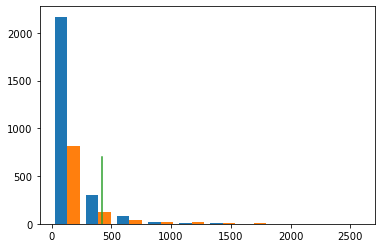

In [192]:
plt.hist([[i for i in lengthham],[j for j in lengthspam]]) #two histograms were created using the increasing monotone function(transformation) y=x^(1/5)
plt.plot([420]*700,list(range(700)))
plt.show()

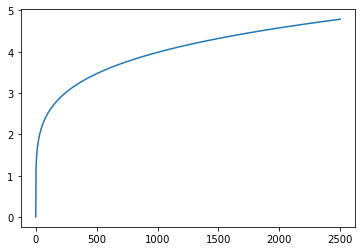

In [194]:
plt.plot([x for x in range(2500)],[y**(1/5) for y in range(2500)])

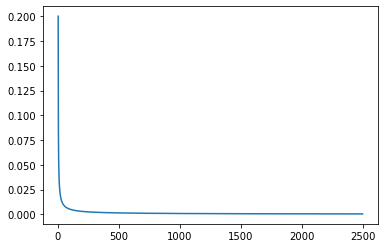

In [199]:
plt.plot([x for x in range(1,2500)],[(1/5)*y**(-4/5) for y in range(1,2500)])

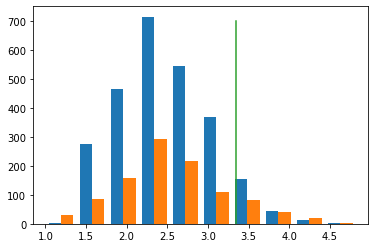

In [187]:
import math # we import the library math to try some transformations
plt.hist([[i**(1/5) for i in lengthham],[j**(1/5) for j in lengthspam]]) #two histograms were created using the increasing monotone function(transformation) y=x^(1/5)
plt.plot([420**(1/5)]*700,list(range(700)))
plt.show()

In [19]:
#After
#Using its own vocabulary
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1,1)).fit(x_train['emails'])

arr=vec.transform(x_train['emails']).toarray()
arr1=vec.transform(x_test['emails']).toarray()


In [167]:
print(attA)
print(att)

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.2941742 0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
[[0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [209]:
#Using my vocabulary
from sklearn.feature_extraction.text import CountVectorizer #It counts the number of occurances for each word (in vocabulary) in each email
from sklearn.feature_extraction.text import TfidfVectorizer #The concept is the same as above but it adds weights instead.
clf=CountVectorizer().fit(bagofwords[0]) #Count vectorizer with vocabulary bagofwords
vec1 = TfidfVectorizer().fit(bagofwords[0]) #TFIDF with vocabulary bagofwords
att=clf.transform(x_train['emails']).toarray() #We transform it into a numpy array
attA=vec1.transform(x_train['emails']).toarray() #same. The two arrays att and attA will train our models. two approaches will be used, one for countvectorizer and one for TFIDF and the results will be recorded 
att1=clf.transform(x_test['emails']).toarray() #These two arrays will help us predicted and evaluate each model
attA1=vec1.transform(x_test['emails']).toarray() #Again, it is used one for countvectorizer and one for tfidf

In [220]:
#First Model
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
gausNB=GaussianNB()
gaus=gausNB.fit(att,y_train['target']) #We train the model CountVecorizer used
gaus1=gausNB.fit(attA,y_train['target']) #Tfidf 
pre=gaus1.predict(attA1) #Predict for tfidf
pre1=gaus.predict(att1) #
print(accuracy_score(pre,y_test['target']))#TFIDF
print(metrics.confusion_matrix(y_test['target'], pre))#TFIDF
print(accuracy_score(pre1,y_test['target']))#CountVectorizer
print(metrics.confusion_matrix(y_test['target'], pre1))#CountVectorizer

0.9639175257731959
[[1075   16]
 [  40  421]]
0.9722938144329897
[[1074   17]
 [  26  435]]


In [31]:
#Second Model
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB1=MNB.fit(attA,y_train['target']) #Same approach as above
MNB2=MNB.fit(att,y_train['target'])
PRE=MNB1.predict(attA1)
PRE1=MNB2.predict(att1)
print(accuracy_score(PRE,y_test['target']))#TFIDF
print(metrics.confusion_matrix(y_test['target'], PRE))#TFIDF Mat Train
print(accuracy_score(PRE1,y_test['target']))#CountVectorizer
print(metrics.confusion_matrix(y_test['target'], PRE1))#CountVectorizer

0.9677835051546392
[[1079   12]
 [  38  423]]
0.9748711340206185
[[1072   19]
 [  20  441]]


In [174]:
#Third Model
#Classification Tree
from sklearn.tree import DecisionTreeClassifier
clft=DecisionTreeClassifier(max_leaf_nodes=250).fit(att,y_train['target'])
clft1=DecisionTreeClassifier(max_leaf_nodes=250).fit(attA,y_train['target'])


In [175]:
#Prediction and accuracy for 3rd model 
pred_tree=clft.predict(att1)
pred_tree1=clft1.predict(attA1)
print(accuracy_score(pred_tree1,y_test['target']))#TFIDF
print(metrics.confusion_matrix(y_test['target'], pred_tree1))#TFIDF
print(accuracy_score(pred_tree,y_test['target']))#CountVectorizer
print(metrics.confusion_matrix(y_test['target'], pred_tree))#CountVectorizer

0.9432989690721649
[[1041   50]
 [  38  423]]
0.9516752577319587
[[1047   44]
 [  31  430]]


In [84]:
#Number of nodes
print(clft.tree_.node_count)#CountVectorizer
print(clft1.tree_.node_count)#TFIDF

275
217


In [168]:
#5-Folds Cross Validation to tune the parameter max leaf nodes 100,150,200,250,300
from sklearn.model_selection import GridSearchCV #27 minutes
import timeit
cv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'max_leaf_nodes':[100,150,200,250,300]},cv=5,n_jobs=1)#n_jobs handles the CPU performance
start = timeit.default_timer()
cross_val=cv.fit(att,y_train['target'])
cross_val1=cv.fit(attA,y_train['target'])
stop = timeit.default_timer()
print('Time: ', (stop - start)/60)

Time:  26.599735273333255


In [172]:
#Results
print(cross_val1.cv_results_['mean_test_score'])
print(cross_val.cv_results_['mean_test_score'])

[0.94640884 0.94696133 0.94696133 0.94696133 0.94392265]
[0.94640884 0.94696133 0.94696133 0.94696133 0.94392265]


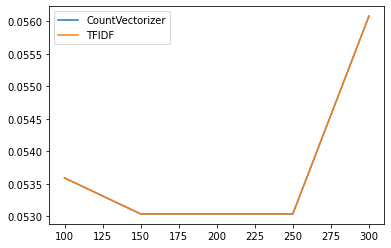

In [170]:
#We plot the results. the two lines are identical
plt.plot([100,150,200,250,300],1-cross_val.cv_results_['mean_test_score'],label='CountVectorizer')
plt.plot([100,150,200,250,300],1-cross_val1.cv_results_['mean_test_score'],label='TFIDF')
plt.legend()
plt.show()

In [171]:
print(cross_val.best_estimator_) #We print the best estimator equivalently best model
print(cross_val1.best_estimator_)

DecisionTreeClassifier(max_leaf_nodes=250)
DecisionTreeClassifier(max_leaf_nodes=250)


In [173]:
predi=cross_val.predict(att1) # we predict using the model was created from cross validation
predi1=cross_val1.predict(attA1)
print(accuracy_score(predi,y_test['target'])) #CountVectorizer
print(metrics.confusion_matrix(y_test['target'], predi))
print(accuracy_score(predi1,y_test['target']))#tfidf
print(metrics.confusion_matrix(y_test['target'], predi1))
#better than the previous one

0.8885309278350515
[[1040   51]
 [ 122  339]]
0.9484536082474226
[[1042   49]
 [  31  430]]


In [85]:
#Fifth model using bagging with bootstrap equals to True and number of models 700. Voting will take place in 700 models and the majority wins
from sklearn.ensemble import BaggingClassifier
modelara=BaggingClassifier(base_estimator=GaussianNB(),max_samples=700,bootstrap=True)


In [176]:
#We train two models for countvectorizer and tfidf
start = timeit.default_timer()
modelara1=modelara.fit(attA,y_train['target'])
modelara2=modelara.fit(att,y_train['target'])
end=timeit.default_timer()
print('time in mins:',(end-start)/60)

time in mins: 2.831422133333399


In [177]:
print(accuracy_score(modelara1.predict(attA1),y_test['target']))#TFIDF
print(accuracy_score(modelara2.predict(att1),y_test['target']))#CountVectorizer

0.9529639175257731
0.9536082474226805


In [133]:
# vote between 3 models. the majority wins
def finalmodelafterbagging(model1,att1,model2,att2,model3,att3): #Models with the correct arrays
    global suming #Global for giving the choice to user to call the value outside of the function
    prediction1=model1.predict(att1) #first model prediction
    prediction2=model2.predict(att2) #Second model prediction
    prediction3=model3.predict(att3) #Third model prefiction
    suming=(prediction1+prediction2+prediction3)/3 #Devide by 3. 3,2,1 and 0 are the value after the addition. deviding by 3 this values converted to 1, 0.6666, 0.3333 and 0  
    suming[suming<0.5]=0 #If we have less than 0.5 means that at least 2 out of 3 models predicted 0. They are the majority and zero will be the final prediction 
    suming[suming>=0.5]=1 #If we have more than 0.5 means that at least 2 out of 3 models predicted 1. They are the majority and 1 will be the final prediction
    return(accuracy_score(suming,y_test['target'])) #Return the accuracy and the array as it is global

In [179]:
import itertools #24 minutes and 31 secs
#The number of models that have been created
start= timeit.default_timer()
listofmodels={0:gaus,1:gaus1,2:MNB2,3:MNB1,4:clft,5:clft1,6:cross_val,7:cross_val1,8:modelara2,9:modelara1}
di={} #an empty dictionart
for i in itertools.combinations(listofmodels, 3): # all the combinations of 3
    if i[0]%2==0: #the if statements were used to assign the correct array. for example gaus,MNB2,clft,cross_val and modelara2 need att1 to predict
        a=att1
    else:
        a=attA1
    if i[1]%2==0:
        b=att1
    else:
        b=attA1
    if i[2]%2==0:
        c=att1
    else:
        c=attA1
    char=str(i[0])+str(i[1])+str(i[2]) #the key will be the best combination of the models. 026 key means that the models 0,2 and 6 will give the best prediction after voting
    di[char]=finalmodelafterbagging(listofmodels[i[0]],a,listofmodels[i[1]],b,listofmodels[i[2]],c) #We pass 3 models and the result will be appended into dictionary
end=timeit.default_timer()
print('time: ',(end-start)/60)

time:  22.40808037


In [180]:
#Best model with the accuracy score
print(max(di, key=di.get))
print(max(di.values()))

027
0.9826030927835051


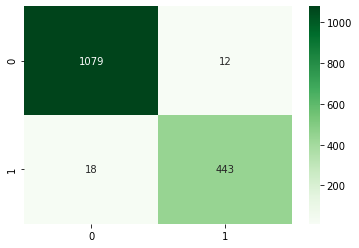

In [181]:
#The final model with the confusion matrix
import seaborn as sns
finalmodelafterbagging(gaus,att1,MNB2,att1,cross_val,att1) #This is the final model
cf_matrix=metrics.confusion_matrix(y_test['target'], suming) #suming is the prediction of the final model
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens',fmt = "")

<AxesSubplot:>

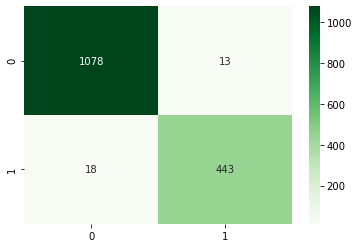

In [183]:
#Voting using all the models less accuracy we select the previous one
dada=np.zeros(1552)

for i in listofmodels.keys():
    if i%2==0:
        dada=dada+listofmodels[i].predict(att1)
    else:
        dada=dada+listofmodels[i].predict(attA1)
        
dada=dada/9
dada[dada<0.5]=0
dada[dada>=0.5]=1
cf_matrix1=metrics.confusion_matrix(y_test['target'], dada)
sns.heatmap(cf_matrix1, annot=True, cmap='Greens',fmt='')